# LSTM MODEL FOR YOUTUBE COMMENTS ANALYSIS

In [ ]:
import pandas as pd
import spacy
import nltk
from nltk.corpus import stopwords
from gensim.models import KeyedVectors
import gensim.downloader as api
from gensim.models import Word2Vec
import tensorflow as tf
import numpy as np


nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Downloading the Google Word2Vec word embeddings
print(api.load("word2vec-google-news-300", return_path=True))

[==================================================] 100.0% 1662.8/1662.8MB downloaded
/root/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz


In [ ]:
# Downloading the Google Word2Vec word embeddings
print(api.load("word2vec-google-news-300", return_path=True))

/root/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz


In [ ]:
#Correct the data path 'preTrainedModelPath' as printed by previous cell if required
preTrainedModelPath = '../root/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz'
word_vectors = KeyedVectors.load_word2vec_format(preTrainedModelPath, binary=True)

In [ ]:
stopWords = set(stopwords.words('english'))
# print(stopWords)
def removeStopWords(tokenizedSentence):
  filteredSent = []
  wordsIgnored = 0
  for token in tokenizedSentence:
    if token in stopWords:
      wordsIgnored+=1
      continue
    filteredSent.append(token)
  # print("Words ignored=",wordsIgnored)
  outputStr = " ".join(filteredSent)
  return outputStr


In [ ]:
#Enter the correct path of the uploaded dataset if different
df = pd.read_csv('output_comments.csv')#('commentsDatasetLarge.csv')#('ytchannel.csv')

In [ ]:
len(df)

425

In [ ]:
df

,Text,Polarity,Sentiment
0,feeling inspired !\n,0.6114,positive
1,awesome\n,0.6249,positive
2,"congratulation sir , let & # 39 ; achieve toge...",0.6981,positive
3,codegnan destination ❤\n,0.6369,positive
4,video lo unna pillalu miru mosapoyaru . sairam...,0.2960,positive
...,...,...,...
420,thank sir sharing valuable information help\n,0.8779,positive
421,sir one doubt looking forward career.i interes...,0.0516,positive
422,congratulation 👏👏👏👏\n,0.5994,positive
423,apply internship delhi ?\n,0.0000,neutral


In [ ]:
import re
def removeExtraSpaces(inputStr):
  text = re.sub("\s{2,}"," ",inputStr)
  return text

# removeExtraSpaces(df['text'][0])

# Performing additional steps in pre-processing: Removal of extra spaces
df['Text'] = df['Text'].apply(lambda x: removeExtraSpaces(x))
df

,Text,Polarity,Sentiment
0,feeling inspired !\n,0.6114,positive
1,awesome\n,0.6249,positive
2,"congratulation sir , let & # 39 ; achieve toge...",0.6981,positive
3,codegnan destination ❤\n,0.6369,positive
4,video lo unna pillalu miru mosapoyaru . sairam...,0.2960,positive
...,...,...,...
420,thank sir sharing valuable information help\n,0.8779,positive
421,sir one doubt looking forward career.i interes...,0.0516,positive
422,congratulation 👏👏👏👏\n,0.5994,positive
423,apply internship delhi ?\n,0.0000,neutral


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize

def tokenize(text):
    return word_tokenize(text)

df['tokenized_text'] = df['Text'].apply(lambda x: tokenize(x))


In [ ]:
df

,Text,Polarity,Sentiment,tokenized_text
0,feeling inspired !\n,0.6114,positive,"[feeling, inspired, !]"
1,awesome\n,0.6249,positive,[awesome]
2,"congratulation sir , let & # 39 ; achieve toge...",0.6981,positive,"[congratulation, sir, ,, let, &, #, 39, ;, ach..."
3,codegnan destination ❤\n,0.6369,positive,"[codegnan, destination, ❤]"
4,video lo unna pillalu miru mosapoyaru . sairam...,0.2960,positive,"[video, lo, unna, pillalu, miru, mosapoyaru, ...."
...,...,...,...,...
420,thank sir sharing valuable information help\n,0.8779,positive,"[thank, sir, sharing, valuable, information, h..."
421,sir one doubt looking forward career.i interes...,0.0516,positive,"[sir, one, doubt, looking, forward, career.i, ..."
422,congratulation 👏👏👏👏\n,0.5994,positive,"[congratulation, 👏👏👏👏]"
423,apply internship delhi ?\n,0.0000,neutral,"[apply, internship, delhi, ?]"


In [ ]:
# Performing additional steps in pre-processing: Removal of stopwords
df['tokenized_text_2'] = df['tokenized_text'].apply(lambda x: removeStopWords(x))

In [ ]:
df['tokenized_text_2'][0]

'feeling inspired !'

In [ ]:
import pickle
df1 = pd.read_pickle("./processed_dataset.pkl")
df1.to_pickle("./processed_dataset.pkl")
#to be ask

In [ ]:
df

,text,polarity,sentiment,tokenized_text,tokenized_text_2
0,god be praised a from drcongo,0.000000,neutral,"[god, be, praised, a, from, drcongo]",god praised drcongo
1,fantastic performance good to see richard,0.550000,positive,"[fantastic, performance, good, to, see, richard]",fantastic performance good see richard
2,greetings from kosovo south east europe,0.000000,neutral,"[greetings, from, kosovo, south, east, europe]",greetings kosovo south east europe
3,it is monday evening in sydney australia when ...,0.387500,positive,"[it, is, monday, evening, in, sydney, australi...",monday evening sydney australia tune week appr...
4,watching this at the end of the day was so upl...,0.475000,positive,"[watching, this, at, the, end, of, the, day, w...",watching end day uplifting comforting song cho...
...,...,...,...,...,...
56776,szelenskyy snow sorting criminal that is a fact,-0.400000,negative,"[szelenskyy, snow, sorting, criminal, that, is...",szelenskyy snow sorting criminal fact
56777,congratulations now europe becomes chessboard ...,0.500000,positive,"[congratulations, now, europe, becomes, chessb...",congratulations europe becomes chessboard supe...
56778,if the west would deliver more weapons atm the...,0.178571,positive,"[if, the, west, would, deliver, more, weapons,...",west would deliver weapons atm seems enough st...
56779,ukrainian people are showing the whole world w...,0.260000,positive,"[ukrainian, people, are, showing, the, whole, ...",ukrainian people showing whole world fighting ...


In [ ]:
sentences = df['tokenized_text_2']
sentences = [str(s) for s in sentences]
sentences

['feeling inspired !',
 'awesome',
 'congratulation sir , let & # 39 ; achieve together ! ! !',
 'codegnan destination ❤',
 'video lo unna pillalu miru mosapoyaru . sairam gadu college management ki paisal ichi mimmalni join chepicharu . vadu maya matalu cheppi dhagera antha kante double paisal vasool chesthadu . jagratha',
 'well said sir ..',
 'p r 🌺',
 'sairam uppagundla , veedu oka big scammer . believe word , loose money . veedu matalu cheppadaniki baga panikosthadu . cheated around 50 people 2013 hyderabad . pedha cheater veedu . video lo matalu chusi mosapokandi , money pay chesaka em cheyaleru . careful guy .',
 'hii im bsc hons agriculture fresher graduate , eligible softwear job , course better learn get job im non c background',
 'insightful informative job aspiring students👏👏more go .',
 'well said !',
 'thank codegnan & # 39 ; useful',
 'hii ... data scientist avvadaniki aiml yedi perfect ga avvali anna first competitive ga strong undali annaru kada .... aaa competitive la

In [ ]:
#All code changes from this point

In [ ]:
def normalizeRangeR(val):
  oldMin = -1.0
  oldMax = 1.0
  newMin =0.0
  newMax = 1.0
  oldRange  = oldMax - oldMin
  newRange = newMax - newMin
  polarity = (((val - oldMin) * newRange) / oldRange) + newMin
  return polarity

def normalizeRangeC(val):
  if val>=0:
    return int(1)
  else:
    return int(0)

# Perform additional steps in data preparation for classification and regression tasks

# Converting labels to 1 or 0 for classification tasks
df['polarity_c']=df['Polarity'].apply(lambda x: normalizeRangeC(x))

# Scaling labels in the range  0 to 1 for regression tasks
df['polarity_r']=df['Polarity'].apply(lambda x: normalizeRangeR(x))


In [ ]:
df

,text,polarity,sentiment,tokenized_text,tokenized_text_2,polarity_c,polarity_r
0,god be praised a from drcongo,0.000000,neutral,"[god, be, praised, a, from, drcongo]",god praised drcongo,1,0.500000
1,fantastic performance good to see richard,0.550000,positive,"[fantastic, performance, good, to, see, richard]",fantastic performance good see richard,1,0.775000
2,greetings from kosovo south east europe,0.000000,neutral,"[greetings, from, kosovo, south, east, europe]",greetings kosovo south east europe,1,0.500000
3,it is monday evening in sydney australia when ...,0.387500,positive,"[it, is, monday, evening, in, sydney, australi...",monday evening sydney australia tune week appr...,1,0.693750
4,watching this at the end of the day was so upl...,0.475000,positive,"[watching, this, at, the, end, of, the, day, w...",watching end day uplifting comforting song cho...,1,0.737500
...,...,...,...,...,...,...,...
56776,szelenskyy snow sorting criminal that is a fact,-0.400000,negative,"[szelenskyy, snow, sorting, criminal, that, is...",szelenskyy snow sorting criminal fact,0,0.300000
56777,congratulations now europe becomes chessboard ...,0.500000,positive,"[congratulations, now, europe, becomes, chessb...",congratulations europe becomes chessboard supe...,1,0.750000
56778,if the west would deliver more weapons atm the...,0.178571,positive,"[if, the, west, would, deliver, more, weapons,...",west would deliver weapons atm seems enough st...,1,0.589286
56779,ukrainian people are showing the whole world w...,0.260000,positive,"[ukrainian, people, are, showing, the, whole, ...",ukrainian people showing whole world fighting ...,1,0.630000


In [ ]:
labelsC = df['polarity_c']
labelsR = df['polarity_r']


In [ ]:
positiveCount = 0
negativeCount = 0
for polarity_c in labelsC:
  if polarity_c == 1:
    positiveCount +=1
  else:
    negativeCount +=1
print("No. of positive comments: ",positiveCount)
print("No. of negative comments: ",negativeCount)
print("Total no. of comments:",(positiveCount+negativeCount))

No. of positive comments:  391
No. of negative comments:  34
Total no. of comments: 425


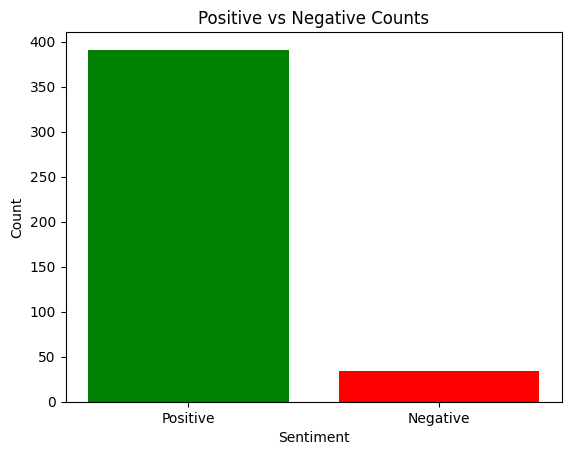

In [ ]:
import matplotlib.pyplot as plt
# Create a bar chart
labels = ['Positive', 'Negative']
values = [positiveCount, negativeCount]
colors = ['green', 'red']
plt.bar(labels, values, color=colors)
plt.title('Positive vs Negative Counts')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [ ]:
# labels = [int(label) for label in labels]

In [ ]:
labelsR

0      0.80570
1      0.81245
2      0.84905
3      0.81845
4      0.64800
        ...   
420    0.93895
421    0.52580
422    0.79970
423    0.50000
424    0.85480
Name: polarity_r, Length: 425, dtype: float64

# LSTM Models: classification and regression

In [ ]:
# CREATING TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
x_trainC, x_testC, y_trainC, y_testC = train_test_split(sentences, labelsC, test_size = 0.3, train_size=0.7, random_state=1)

x_trainR, x_testR, y_trainR, y_testR = train_test_split(sentences, labelsR, test_size = 0.3, train_size=0.7, random_state=1)

In [ ]:
len(y_trainC)

297

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(x_trainC)
vocab_size = len(tokenizer.word_counts) + 2

In [ ]:
print(vocab_size)

1130


In [ ]:
word2idx= tokenizer.word_index
idx2word = {k:v for (v,k) in word2idx.items()}

In [ ]:
# word2idx

In [ ]:
seqLengths = np.array([len( s.split() ) for s in x_trainC] )
print( [ (p, np.percentile(seqLengths, p)) for p in [25,50,75,80,90,95,99,100]])

[(25, 3.0), (50, 6.0), (75, 13.0), (80, 15.0), (90, 25.0), (95, 35.39999999999998), (99, 253.2000000000001), (100, 436.0)]


In [ ]:
maxSeqLen = 125

In [ ]:

x_train_as_ints = tokenizer.texts_to_sequences(x_trainC)
x_train_as_ints = tf.keras.preprocessing.sequence.pad_sequences(x_train_as_ints, maxlen=maxSeqLen)

y_train_as_ints_C = np.array(y_trainC)
y_train_as_ints_R = np.array(y_trainR)

In [ ]:
x_test_as_ints = tokenizer.texts_to_sequences(x_testC)
x_test_as_ints = tf.keras.preprocessing.sequence.pad_sequences(x_test_as_ints, maxlen=maxSeqLen)

y_test_as_ints_C = np.array(y_testC)
y_test_as_ints_R = np.array(y_testR)

In [ ]:
# Creating and embedding matrix for our vocabulary

embedding_dim = 300
hits = 0
misses =0

embeddingMatrix = np.zeros((vocab_size,embedding_dim))
for word, i in tokenizer.word_index.items():
  if word in word_vectors:
    embeddingVector = word_vectors[word]
    embeddingMatrix[i] = embeddingVector
    hits+=1
  else:
    misses+=1

In [ ]:
print("Converted words: %d (no. of misses: %d)" % (hits, misses))

Converted words: 881 (no. of misses: 248)


In [ ]:
# Defining the classification model

modelC = tf.keras.models.Sequential()
modelC.add(tf.keras.layers.Embedding(
    vocab_size,
    300,
    input_length=maxSeqLen,
    embeddings_initializer=tf.keras.initializers.Constant(embeddingMatrix),
    trainable=False) )
modelC.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(maxSeqLen)))
# modelC.add(tf.keras.layers.LSTM(105, dropout=0.5, recurrent_dropout=0.5))
modelC.add(tf.keras.layers.Dense(64,activation='relu'))
modelC.add(tf.keras.layers.Dense(1,activation="sigmoid"))

In [ ]:
# Defining the regression model

modelR = tf.keras.models.Sequential()
modelR.add(tf.keras.layers.Embedding(
    vocab_size,
    300,
    input_length=maxSeqLen,
    embeddings_initializer=tf.keras.initializers.Constant(embeddingMatrix),
    trainable=False) )
modelR.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(maxSeqLen)))
# modelR.add(tf.keras.layers.LSTM(105, dropout=0.5, recurrent_dropout=0.5))
modelR.add(tf.keras.layers.Dense(64,activation='relu'))
modelR.add(tf.keras.layers.Dense(1))

In [ ]:
data_dir = '../root/data'
logs_dir = '../root/logs'

best_model_file_C = '../root/data/best_model_C.h5'
best_model_file_R = '../root/data/best_model_R.h5'

checkpointC = tf.keras.callbacks.ModelCheckpoint(best_model_file_C,save_best_only=True,save_weights_only=True)
checkpointR = tf.keras.callbacks.ModelCheckpoint(best_model_file_R,save_best_only=True,save_weights_only=True)

tensorboard = tf.keras.callbacks.TensorBoard(log_dir=logs_dir)

In [ ]:
modelC.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy']
               )
print(modelC.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 125, 300)          339000    
                                                                 
 bidirectional (Bidirection  (None, 250)               426000    
 al)                                                             
                                                                 
 dense (Dense)               (None, 64)                16064     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 781129 (2.98 MB)
Trainable params: 442129 (1.69 MB)
Non-trainable params: 339000 (1.29 MB)
_________________________________________________________________
None


In [ ]:
modelR.compile(loss='mse',
               optimizer='adam',
               metrics=['mse']
               )
print(modelC.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 125, 300)          339000    
                                                                 
 bidirectional (Bidirection  (None, 250)               426000    
 al)                                                             
                                                                 
 dense (Dense)               (None, 64)                16064     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 781129 (2.98 MB)
Trainable params: 442129 (1.69 MB)
Non-trainable params: 339000 (1.29 MB)
_________________________________________________________________
None


# Training and evaluating LSTM classification model

In [ ]:
historyC = modelC.fit(x_train_as_ints, y_train_as_ints_C, epochs=3,validation_split=0.2,batch_size =64,callbacks=[checkpointC, tensorboard])

Epoch 1/3
4/4 [==============================] - 8s 876ms/step - loss: 0.6380 - accuracy: 0.8228 - val_loss: 0.5354 - val_accuracy: 0.9167
Epoch 2/3
4/4 [==============================] - 2s 543ms/step - loss: 0.4660 - accuracy: 0.9283 - val_loss: 0.3599 - val_accuracy: 0.9167
Epoch 3/3
4/4 [==============================] - 2s 526ms/step - loss: 0.3942 - accuracy: 0.9283 - val_loss: 0.4335 - val_accuracy: 0.9167


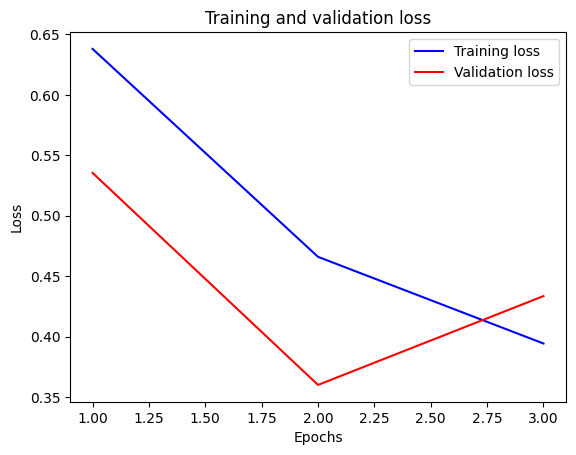

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Plot the training and validation loss vs epoch
train_loss = historyC.history['loss']
val_loss = historyC.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
modelC.load_weights(best_model_file_C)
modelC.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
modelC.evaluate(x_test_as_ints,y_test_as_ints_C)

4/4 [==============================] - 2s 132ms/step - loss: 0.3979 - accuracy: 0.9062


[0.3979436755180359, 0.90625]

In [ ]:
testSentences = ["this is a bad product", 'amazing music', "horrible attitude of this politician", "This is shambolic"]
# testSentences = ["this is a bad product"]

cleanedSentences = []
for sen in testSentences:
  cleanedSent  = removeStopWords(tokenize(sen))
  cleanedSentences.append(cleanedSent)

testSentences = np.array(cleanedSentences)

x_as_ints = tokenizer.texts_to_sequences(testSentences)
x_as_ints = tf.keras.preprocessing.sequence.pad_sequences(x_as_ints, maxlen=maxSeqLen)

x = modelC.predict(x_as_ints)

1/1 [==============================] - 1s 1s/step


In [ ]:
for val in x:
  print(val)

[0.71793336]
[0.69127834]
[0.63545394]
[0.6655223]


In [ ]:
for prob in x:
  if prob >= 0.5:
    print("Positive")
  else:
    print("Negative")

Positive
Positive
Positive
Positive


In [ ]:
modelC.save("yt_comments.h5")

In [ ]:
print(y_train_as_ints_R)
historyR = modelR.fit(x_train_as_ints, y_train_as_ints_R, epochs=4,validation_split=0.2,batch_size =64,callbacks=[checkpointR, tensorboard])

[0.77115 0.71075 0.5386  0.97795 0.5     0.5     0.6868  0.5     0.6806
 0.5     0.67    0.71075 0.5     0.71075 0.5     0.87895 0.5     0.5
 0.83525 0.6591  0.93385 0.7997  0.8548  0.71075 0.76335 0.6591  0.9158
 0.57655 0.5     0.5     0.5     0.7202  0.5     0.70095 0.29905 0.70095
 0.5     0.5     0.6806  0.5     0.71075 0.71075 0.9187  0.5     0.71075
 0.6366  0.7202  0.8057  0.19615 0.5     0.94985 0.58895 0.752   0.943
 0.70995 0.5     0.74695 0.24045 0.9187  0.78595 0.70095 0.5386  0.6806
 0.96435 0.3091  0.9063  0.7202  0.78595 0.8872  0.89225 0.71075 0.74355
 0.5     0.5     0.5     0.83525 0.9088  0.9037  0.5     0.8825  0.7202
 0.25305 0.71075 0.6591  0.71075 0.5     0.7202  0.8404  0.5     0.6591
 0.5     0.71075 0.5     0.81245 0.5     0.7202  0.70095 0.71075 0.7369
 0.5     0.5     0.77115 0.5     0.5     0.9329  0.7202  0.5386  0.5
 0.67    0.6591  0.352   0.6691  0.5     0.5     0.6591  0.6591  0.7202
 0.6806  0.5     0.82985 0.5     0.9063  0.70995 0.8062  0.6909  0.6

In [ ]:
modelR.load_weights(best_model_file_R)
modelR.compile(loss='mse',optimizer='adam',metrics=['mse'])

In [ ]:
modelR.evaluate(x_test_as_ints,y_test_as_ints_R)

533/533 [==============================] - 79s 145ms/step - loss: 0.0067 - mse: 0.0067


[0.006677232217043638, 0.006677232217043638]

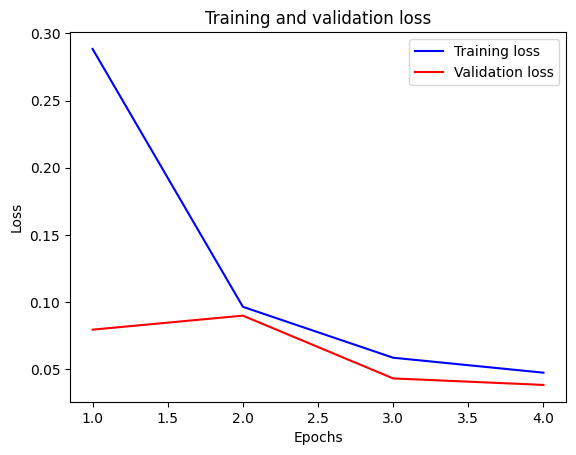

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Plot the training and validation loss vs epoch
train_loss = historyR.history['loss']
val_loss = historyR.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
testSentences = ["this is a bad product", 'amazing music', "horrible attitude of this politician", "This is shambolic"]

cleanedSentences = []
for sen in testSentences:
  cleanedSent  = removeStopWords(tokenize(sen))
  cleanedSentences.append(cleanedSent)

testSentences = np.array(cleanedSentences)

x_as_ints = tokenizer.texts_to_sequences(testSentences)
x_as_ints = tf.keras.preprocessing.sequence.pad_sequences(x_as_ints, maxlen=maxSeqLen)

x = modelR.predict(x_as_ints)

1/1 [==============================] - 1s 819ms/step


In [ ]:
print("Polarities")
for pol in x:
  print(pol)

Polarities
[0.36771613]
[0.4145003]
[0.19848342]
[0.3053289]
